<a href="https://colab.research.google.com/github/devvashisth07/early-event-detection/blob/main/EED_using_bottom_up_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-d6e4f95ecd35>:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


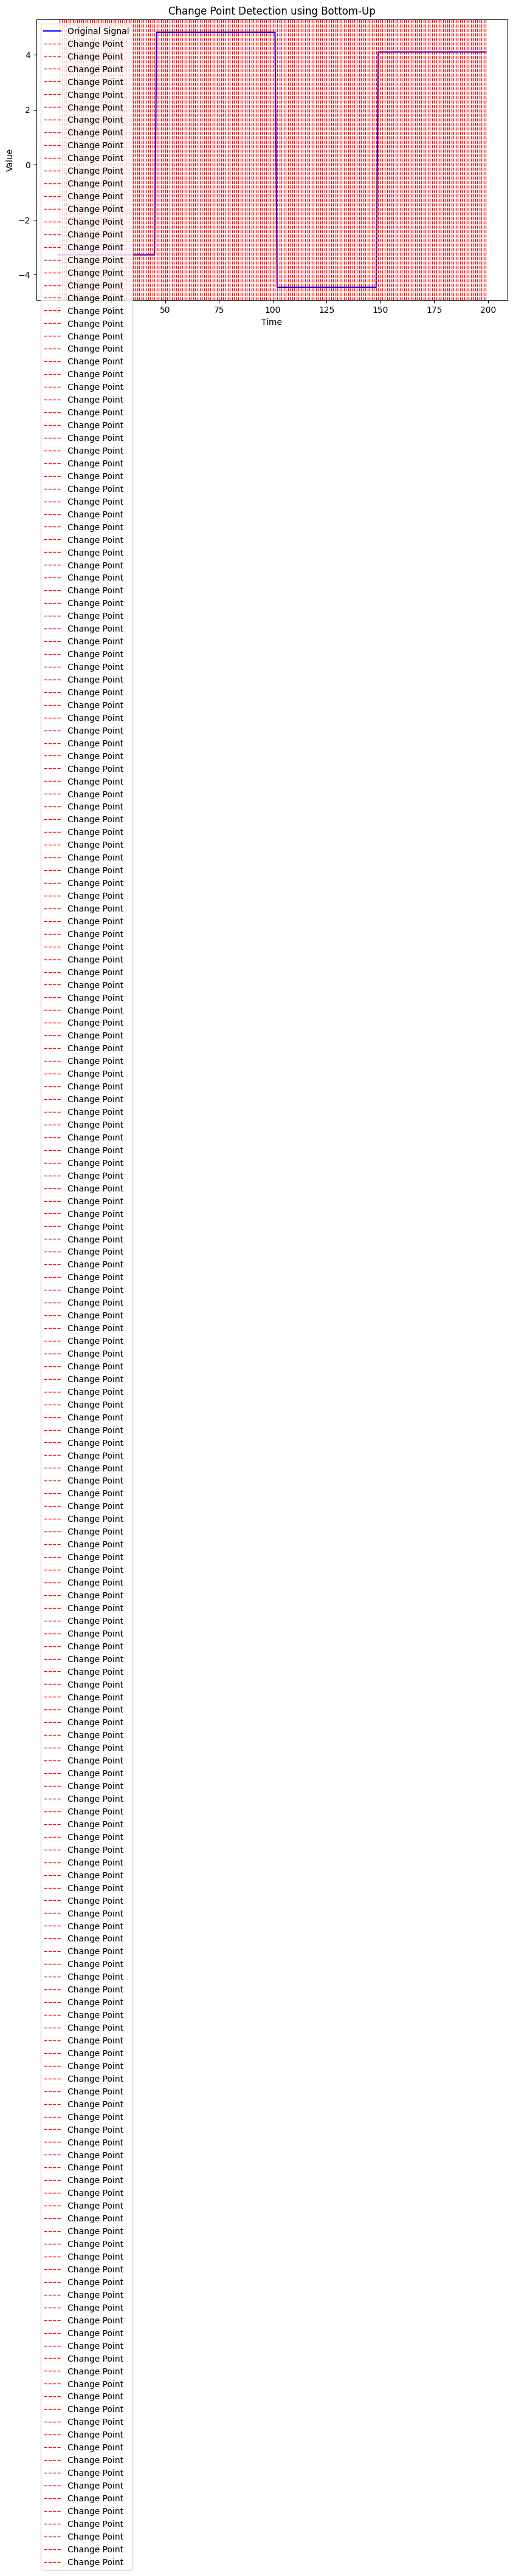

In [2]:
!pip install ruptures
import numpy as np
import matplotlib.pyplot as plt
from ruptures.datasets import pw_constant  # Import pw_constant from the correct module

# Generate example data
n_samples = 200
n_bkps = 3
signal, _ = pw_constant(n_samples=n_samples, n_features=1, n_bkps=n_bkps)

# Define a custom cost function
def custom_cost(cpt, data):
    mean_before = np.mean(data[:cpt])
    mean_after = np.mean(data[cpt:])
    return (mean_after - mean_before)**2

# Bottom-Up change point detection
def bottom_up(data, cost_function):
    n_samples = len(data)
    change_points = []

    for i in range(1, n_samples):
        cost = cost_function(i, data)
        change_points.append((i, cost))

    change_points.sort(key=lambda x: x[1], reverse=True)
    return [cpt[0] for cpt in change_points]

# Perform Bottom-Up change point detection
change_points = bottom_up(signal, custom_cost)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(signal, color='blue', label='Original Signal')

for bkpt in change_points:
    plt.axvline(x=bkpt, color='red', linestyle='--', linewidth=1, label='Change Point')

plt.title("Change Point Detection using Bottom-Up")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

